# Anime Score Linear Regression

## **Goal of the Project**
-Create a a linear regrssion model for Anime Scores using data from https://myanimelist.net/
<br>
-Create a data Scrapper to get data from the html code from https://myanimelist.net/
<br>
-Do some data visualization on the data

# Table of Content
- <a href ='#dataviz'>Data Visualization</a>
- <a href ='#linreg'>Linear Regression(no categorical)</a>
- <a href ='#results1'>Results for model 1</a>
- <a href ='#linreg2'>Linear Regression(categorical added)</a>
- <a href ='#results2'>Results for model 2</a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## **Data from csv**
-All data scrapped from https://myanimelist.net/

In [2]:
#Load the data from the CSV file
df = pd.read_csv('malData-main.csv')
df

,Title,Score,EpisodeCount,Studio,Source,Aired,Members,Favorites,Popularity,Rank
0,Fullmetal Alchemist: Brotherhood,9.15,64,Bones,Manga,Spring 2009,2828807,198366,3,1
1,Gintama\Gintama Season 4,9.09,51,Bandai Namco Pictures,Manga,Spring 2015,520863,13841,336,2
2,Steins;Gate,9.09,24,White Fox,Visual novel,Spring 2011,2196795,167810,13,3
3,Shingeki no Kyojin Season 3 Part 2\Attack on T...,9.08,10,Wit Studio,Manga,Spring 2019,1774864,49604,31,4
4,"Gintama\Gintama Season 2""",9.06,51,Sunrise,Manga,Spring 2011,458603,6832,383,5
...,...,...,...,...,...,...,...,...,...,...
1185,Fairy Tail (2014)\Fairy Tail Series 2,7.66,102,"A-1 Pictures, Bridge",Manga,Spring 2014,866337,11150,146,1186
1186,Hai to Gensou no Grimgar\Grimgar: Ashes and Il...,7.66,12,A-1 Pictures,Light novel,Winter 2016,639867,5389,241,1187
1187,Inuyashiki\Inuyashiki: Last Hero,7.66,11,MAPPA,Manga,Fall 2017,549707,3289,315,1188
1188,Junjou Romantica 3\Junjo Romantica 3,7.66,12,Studio Deen,Manga,Summer 2015,109963,477,1581,1189


<a id ='dataviz'></a>

## **Data Visualization**
Here we have some simple graphs to show some relationships between variables

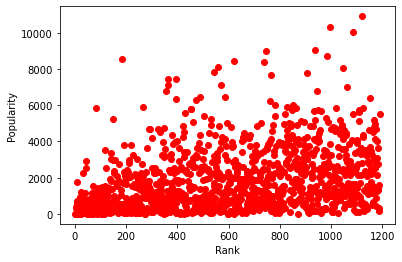

In [3]:
#Here we have the show's Ranking compared to its Popularity
%matplotlib inline
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.scatter(df.Rank,df.Popularity, color='red')

In [4]:
df.shape

(1190, 10)

In [5]:
#Here we describe our data to get a better idea on the numbers
df.describe()

,Score,EpisodeCount,Members,Favorites,Popularity,Rank
count,1190.000000,1190.000000,1.190000e+03,1190.000000,1190.000000,1190.000000
mean,8.042445,18.752941,3.163285e+05,6112.086555,1829.521849,595.500000
std,0.308998,61.520798,4.506633e+05,16330.340594,1724.835019,343.667717
min,7.660000,0.000000,1.246000e+03,6.000000,1.000000,1.000000
25%,7.790000,1.000000,4.527425e+04,171.500000,494.250000,298.250000
50%,7.970000,12.000000,1.463190e+05,934.000000,1276.500000,595.500000
75%,8.220000,24.000000,3.649398e+05,4458.500000,2741.500000,892.750000
max,9.150000,1787.000000,3.350249e+06,198366.000000,10910.000000,1190.000000


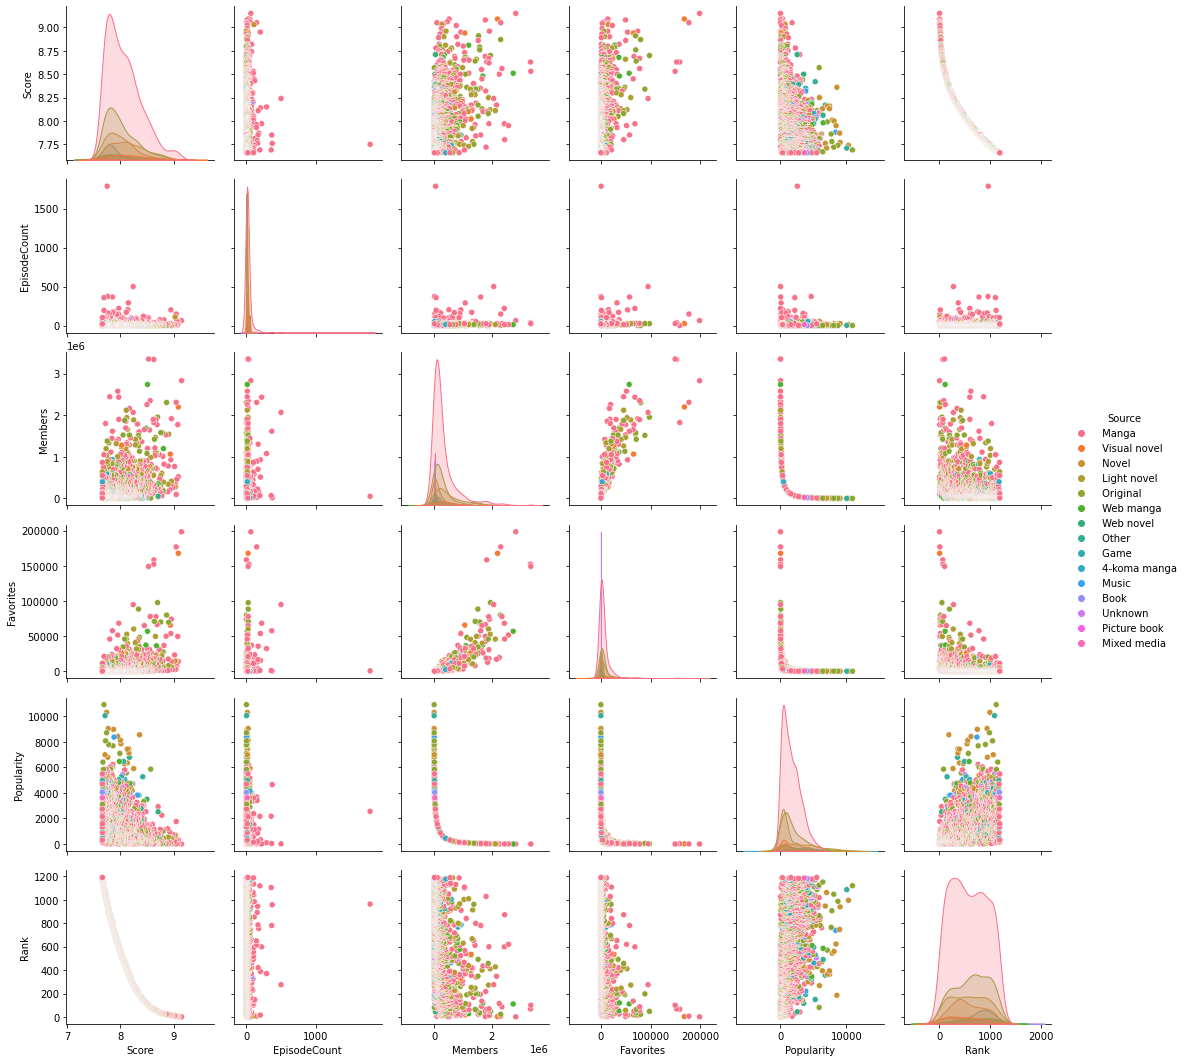

In [6]:
#Pairplots for the variables seperated by their Source material
sns.pairplot(df, hue='Source')

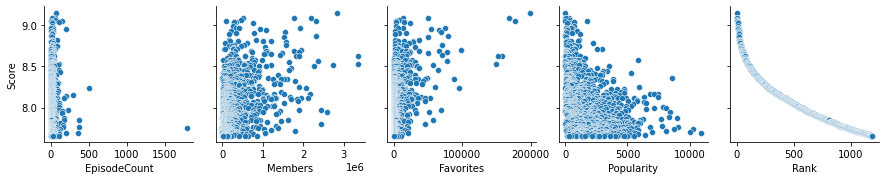

In [7]:
#Pairplots for Score
sns.pairplot(df, x_vars=['EpisodeCount','Members','Favorites','Popularity','Rank'], y_vars=['Score'])

<AxesSubplot:>

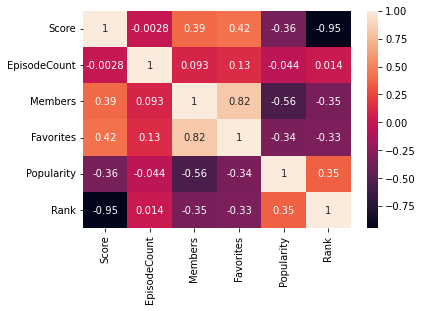

In [8]:
sns.heatmap(df.corr(), annot= True)

<AxesSubplot:xlabel='Favorites', ylabel='Score'>

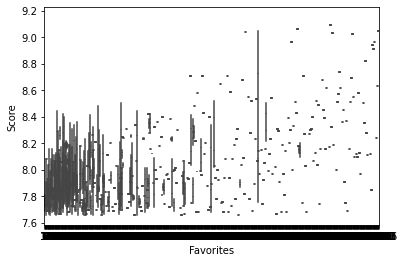

In [9]:
sns.boxplot(y='Score',x='Favorites',data=df)

<a id ='linreg'></a>

## **Linear Regression(no categorical)**
Here we have the linear regression model, this model does not include categorical variables

In [12]:
x = df[['EpisodeCount','Members','Favorites','Popularity','Rank']]
y= df[['Score']]

In [13]:
#Creating the train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(833, 5)
(357, 5)
(833, 1)
(357, 1)


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [24]:
model.fit(x_train,y_train)
print(model.intercept_)
print(model.coef_)

[8.54630959]
[[-2.01039225e-05 -7.80518709e-08  3.65967165e-06 -5.23653282e-06
  -8.25387916e-04]]


In [29]:
predictions = model.predict(x_test)
predictions

array([[7.5529411 ],
       [7.95967548],
       [8.43353556],
       [7.87906694],
       [8.19564043],
       [8.20009127],
       [8.44846482],
       [8.26600456],
       [8.09111816],
       [7.68666584],
       [8.42068116],
       [8.3705574 ],
       [7.94451739],
       [7.93138186],
       [8.16810864],
       [8.09406515],
       [7.60973468],
       [7.7106511 ],
       [7.69312262],
       [7.58392641],
       [8.44710912],
       [7.86070818],
       [8.3524211 ],
       [7.76728546],
       [7.96329833],
       [7.88259596],
       [8.01511819],
       [8.30306098],
       [7.58737143],
       [7.89914469],
       [7.80270127],
       [8.38174869],
       [7.56329967],
       [8.43423944],
       [8.16557282],
       [8.21718129],
       [7.55568711],
       [8.01734413],
       [7.91229269],
       [7.97734302],
       [7.71585355],
       [8.49673919],
       [8.03275775],
       [7.73121165],
       [8.03879621],
       [8.23570065],
       [8.53113979],
       [8.786

<a id ='results1'></a>

## **Results for model 1**
Here we see that episodeCount is the only indicater that has a p valuce greater than 0.05 so it not significant.
<br>
You can also see from the graph that the model is somewhat accurate with a R-squared of 0.912.

C:\Users\starm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score'>

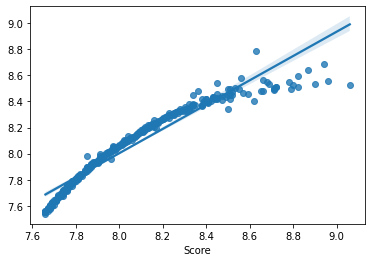

In [30]:
sns.regplot(y_test,predictions)

In [32]:
import statsmodels.api as sm
x_train_Sm= sm.add_constant(x_train)
x_train_Sm= sm.add_constant(x_train)
ls=sm.OLS(y_train,x_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1716.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:40:13   Log-Likelihood:                 806.43
No. Observations:                 833   AIC:                            -1601.
Df Residuals:                     827   BIC:                            -1573.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.5463      0.009    935.217   

C:\Users\starm\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<a id ='linreg2'></a>

## **Linear Regression(categorical added)**
Here we have the linear regression model, this model also adds Source as a categorical indicator

In [33]:
x = df[['EpisodeCount','Source','Members','Favorites','Popularity','Rank']]
x = pd.get_dummies(data = x, drop_first= True)
x.head()

,EpisodeCount,Members,Favorites,Popularity,Rank,Source_ Book,Source_ Game,Source_ Light novel,Source_ Manga,Source_ Mixed media,Source_ Music,Source_ Novel,Source_ Original,Source_ Other,Source_ Picture book,Source_ Unknown,Source_ Visual novel,Source_ Web manga,Source_ Web novel
0,64,2828807,198366,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,51,520863,13841,336,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,24,2196795,167810,13,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10,1774864,49604,31,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,51,458603,6832,383,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(833, 19)
(357, 19)
(833, 1)
(357, 1)


In [35]:
model = LinearRegression()

In [36]:
model.fit(x_train,y_train)
print(model.intercept_)
print(model.coef_)

[8.5461936]
[[-2.48266598e-05 -7.67351978e-08  3.64942542e-06 -4.04065492e-06
  -8.27698117e-04  7.07667242e-02 -1.93756624e-02 -7.09187884e-03
   3.38987119e-03  3.03884050e-02 -2.68857982e-02 -1.54128048e-02
  -1.08612842e-02  5.59770917e-03 -6.28156535e-02 -1.72727253e-02
  -1.05493966e-03  3.87207630e-02  2.69518599e-02]]


In [37]:
predictions = model.predict(x_test)
predictions

array([[7.55681553],
       [7.96327493],
       [8.42704498],
       [7.86330636],
       [8.19922457],
       [8.20460451],
       [8.45335378],
       [8.27062927],
       [8.09420057],
       [7.68382581],
       [8.42468254],
       [8.36111128],
       [7.94727641],
       [7.93858487],
       [8.17143721],
       [8.09705706],
       [7.60108058],
       [7.74848255],
       [7.68103623],
       [7.58613829],
       [8.44065221],
       [7.84985828],
       [8.34569876],
       [7.769529  ],
       [7.96619618],
       [7.87568487],
       [8.02071247],
       [8.30753798],
       [7.5807867 ],
       [7.90083379],
       [7.79568202],
       [8.37189353],
       [7.55696951],
       [8.43808602],
       [8.15314347],
       [8.22066145],
       [7.54369026],
       [8.06022015],
       [7.90080263],
       [7.96767274],
       [7.70764727],
       [8.52649501],
       [8.02519625],
       [7.71655411],
       [8.04503273],
       [8.23700456],
       [8.53536695],
       [8.792

<a id ='results2'></a>

## **Results for model 2**
Here for model 2 we can see adding the categorical indicator of Source does not affect the model in a significant way.
<br>
I also did test other categorical indicators like Studio and it also did not affect the model in a significant way.

C:\Users\starm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score'>

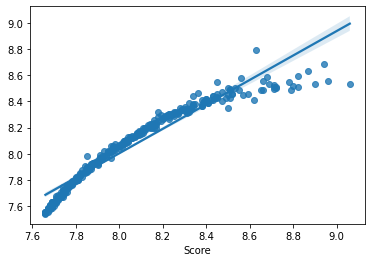

In [38]:
sns.regplot(y_test,predictions)

In [39]:
x_train_Sm= sm.add_constant(x_train)
x_train_Sm= sm.add_constant(x_train)
ls=sm.OLS(y_train,x_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:59:37   Log-Likelihood:                 812.35
No. Observations:                 833   AIC:                            -1585.
Df Residuals:                     813   BIC:                            -1490.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5462 

C:\Users\starm\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
x = df[['EpisodeCount','Studio','Members','Favorites','Popularity','Rank']]
x = pd.get_dummies(data = x, drop_first= True)
x.head()

,EpisodeCount,Members,Favorites,Popularity,Rank,Studio_ 8bit,Studio_ A-1 Pictures,"Studio_ A-1 Pictures, Bridge","Studio_ A-1 Pictures, Lapin Track",Studio_ A.C.G.T.,...,Studio_ Yokohama Animation Lab,Studio_ Yumeta Company,Studio_ Zero-G,Studio_ Zexcs,Studio_ dwarf,Studio_ feel.,Studio_ production doA,Studio_ ufotable,Studio_Studios: Brains Base,"Studio_Studios: Brains Base, Marvy Jack"
0,64,2828807,198366,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51,520863,13841,336,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24,2196795,167810,13,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,1774864,49604,31,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51,458603,6832,383,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
